<a href="https://colab.research.google.com/github/adarshagrawal38/ConsumerBehaviourPrediction/blob/master/ConsumerBehaviourPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# In our data set we have customer age, gender and estimated salary based on that we will try to predict custome will buy our product or not
import pandas as pd
dataset = pd.read_csv('Customer_Behaviour.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
# remove userid
dataset = dataset.drop('User ID', axis=1)
dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [17]:
#one hot encoding on gender
dataset = pd.get_dummies(dataset, prefix='Gender')
dataset

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1
...,...,...,...,...,...
395,46,41000,1,1,0
396,51,23000,1,0,1
397,50,20000,1,1,0
398,36,33000,0,0,1


In [30]:
import numpy as np
from sklearn import preprocessing

float_array = dataset[['Age', 'EstimatedSalary','Gender_Female','Gender_Male', 'Purchased']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)
df_normalized = pd.DataFrame(scaled_array, columns=['Age', 'EstimatedSalary', 'Gender_Female','Gender_Male', 'Purchased'])
df_normalized

,Age,EstimatedSalary,Gender_Female,Gender_Male,Purchased
0,0.023810,0.029630,0.0,1.0,0.0
1,0.404762,0.037037,0.0,1.0,0.0
2,0.190476,0.207407,1.0,0.0,0.0
3,0.214286,0.311111,1.0,0.0,0.0
4,0.023810,0.451852,0.0,1.0,0.0
...,...,...,...,...,...
395,0.666667,0.192593,1.0,0.0,1.0
396,0.785714,0.059259,0.0,1.0,1.0
397,0.761905,0.037037,1.0,0.0,1.0
398,0.428571,0.133333,0.0,1.0,0.0


In [47]:
#deviding dataset into training and testing part
from sklearn.model_selection import train_test_split
x = df_normalized.drop('Purchased', axis=1)
print(x)
y =df_normalized['Purchased']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
x_train

          Age  EstimatedSalary  Gender_Female  Gender_Male
0    0.023810         0.029630            0.0          1.0
1    0.404762         0.037037            0.0          1.0
2    0.190476         0.207407            1.0          0.0
3    0.214286         0.311111            1.0          0.0
4    0.023810         0.451852            0.0          1.0
..        ...              ...            ...          ...
395  0.666667         0.192593            1.0          0.0
396  0.785714         0.059259            0.0          1.0
397  0.761905         0.037037            1.0          0.0
398  0.428571         0.133333            0.0          1.0
399  0.738095         0.155556            1.0          0.0

[400 rows x 4 columns]


,Age,EstimatedSalary,Gender_Female,Gender_Male
181,0.309524,0.414815,1.0,0.0
303,0.452381,0.474074,0.0,1.0
316,0.857143,0.659259,1.0,0.0
147,0.547619,0.111111,1.0,0.0
379,0.952381,0.059259,1.0,0.0
...,...,...,...,...
91,0.285714,0.748148,1.0,0.0
321,0.833333,0.496296,1.0,0.0
250,0.619048,0.177778,1.0,0.0
377,0.571429,0.281481,1.0,0.0


In [49]:
#Applying naive bayes algorithm
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
classifier = GaussianNB()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

acc = accuracy_score(y_test, y_pred)
print(acc)

0.9125


In [50]:
#Applying radom forest algo
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


model_rf = RandomForestClassifier(n_estimators=300, oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 50)
model_rf.fit(x_train, y_train)

# Make predictions
prediction_test = model_rf.predict(x_test)
print ("Accuracy : ",metrics.accuracy_score(y_test, prediction_test))

Accuracy :  0.9375


In [57]:
#Applying SVM
from sklearn import svm
from sklearn import metrics
classifier_svm = svm.SVC()
classifier_svm.fit(x_train, y_train)

y_pred = classifier_svm.predict(x_test)


print ("SVM Accuracy : ",metrics.accuracy_score(y_test, y_pred))

SVM Accuracy :  0.9


In [58]:
#Applying decision tree
from sklearn import tree
from sklearn import metrics
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
print('Decision tree accuracy: ', metrics.accuracy_score(y_test, y_pred))

Decision tree accuracy:  0.9


[Text(158.68125, 209.07692307692307, 'X[0] <= 0.631\ngini = 0.469\nsamples = 320\nvalue = [200, 120]'),
 Text(85.44375000000001, 192.35076923076923, 'X[1] <= 0.559\ngini = 0.29\nsamples = 227\nvalue = [187, 40]'),
 Text(38.362500000000004, 175.62461538461537, 'X[0] <= 0.44\ngini = 0.072\nsamples = 187\nvalue = [180, 7]'),
 Text(31.387500000000003, 158.89846153846153, 'gini = 0.0\nsamples = 127\nvalue = [127, 0]'),
 Text(45.337500000000006, 158.89846153846153, 'X[1] <= 0.507\ngini = 0.206\nsamples = 60\nvalue = [53, 7]'),
 Text(38.362500000000004, 142.1723076923077, 'X[1] <= 0.389\ngini = 0.183\nsamples = 59\nvalue = [53, 6]'),
 Text(31.387500000000003, 125.44615384615385, 'gini = 0.0\nsamples = 29\nvalue = [29, 0]'),
 Text(45.337500000000006, 125.44615384615385, 'X[0] <= 0.464\ngini = 0.32\nsamples = 30\nvalue = [24, 6]'),
 Text(13.950000000000001, 108.72, 'X[1] <= 0.411\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(6.9750000000000005, 91.99384615384615, 'gini = 0.0\nsamples = 1\n

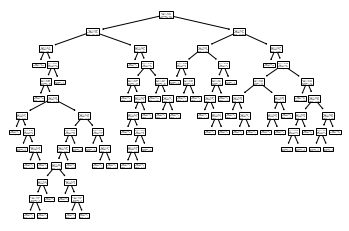

In [59]:
tree.plot_tree(clf) 

In [63]:
#Applying logistics regression
from sklearn.linear_model import LogisticRegression

lf = LogisticRegression(random_state=0).fit(x_train, y_train)
y_ped = clf.predict(x_test)
print('Logistic Regression accuracy: ', metrics.accuracy_score(y_test, y_ped))

0.996875
Logistic Regression accuracy:  0.9
